<a href="https://colab.research.google.com/github/abinarain/DMWAS/blob/master/ProjectMOA1GdscErlotinibIc50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Author: Abhishek N. Singh
#Description: This script evaluates the IC50 value for a drug when acting against cell viability such 
#as cancer cells, and then I try to fit a regression model
#Date: 9th December 2020

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
import seaborn as sns





In [ ]:
dataset = pd.read_csv("gdsc_Erlotinib_ic50.csv", delimiter=",")

In [ ]:
dataset.head()

,Unnamed: 0,Unnamed: 0.1,exp_COPZ2,exp_CRLF1,exp_TAC1,exp_ADIPOR2,exp_IFFO1,exp_KDM5D,exp_CD6,exp_STMN4,exp_KCNG1,exp_ABCF2,exp_CLEC16A,exp_ANO2,exp_MAP4,exp_RSF1,exp_MSMO1,exp_KIF1B,exp_GALC,exp_TRAF1,exp_RC3H2,exp_POU1F1,exp_OAT,exp_SNAP91,exp_SLK,exp_GOLGA5,exp_FECH,exp_IARS2,exp_IFI35,exp_ATP11A,exp_SRBD1,exp_MAPK6,exp_POLB,exp_CPSF1,exp_MPP5,exp_XRCC1,exp_CLCN4,exp_DHRS9,exp_PTPLAD1,exp_ARHGEF10L,...,exp_GRIK2,exp_SH3GLB1,exp_CRYBB3,exp_ADRA2A,exp_PROP1,exp_ZBTB39,exp_TMPRSS15,exp_KRT75,exp_KCTD14,exp_SIPA1,exp_IFT57,exp_UCN,exp_PITPNM1,exp_PLXNC1,exp_BTG1,exp_PYCARD,exp_LRBA,exp_NFIX,exp_ARHGAP11A,exp_WNT2,exp_CLEC1A,exp_AC016745.2,exp_MRPS30,exp_PDHX,exp_IFRD1,exp_WSB1,exp_FAM65B,exp_RAB11B,exp_ROGDI,exp_SCN8A,exp_POMT1,exp_NKG7,exp_SLC6A16,exp_CCDC91,exp_CACNA1A,exp_ZSCAN18,exp_FRK,exp_MCF2,exp_TULP3,Erlotinib
0,0,22RV1,NaN,4.248105,4.282751,8.576592,5.070674,7.759352,4.602019,5.190350,7.385830,6.171773,4.987999,4.386405,8.319581,5.124842,11.375434,6.950165,5.217493,NaN,6.435574,NaN,9.526227,6.999370,8.224666,8.260464,7.391606,10.130519,4.870403,4.980934,5.472737,NaN,9.001038,6.675385,NaN,6.187631,4.315376,4.931067,7.130860,5.633721,...,4.686992,7.177287,NaN,6.883827,4.598454,NaN,4.284136,NaN,4.440254,4.911507,9.585117,5.027490,5.036847,NaN,9.791068,4.625075,7.681521,6.666518,5.270228,5.207163,5.422417,4.337242,8.241133,8.382914,9.184904,7.742239,4.287793,5.283270,6.230765,4.822764,6.456653,4.176977,4.631245,7.569865,3.977183,5.957110,4.175269,4.545129,6.618855,-1.48802
1,1,23132-87,4.751625,5.023276,4.115669,9.590657,5.061421,7.587566,5.236536,4.443490,5.612640,6.730912,4.864545,4.943098,8.066804,6.124239,10.231029,7.489231,7.691186,5.011970,5.999923,4.308970,9.492482,4.030367,NaN,9.338579,6.708432,9.453979,6.439538,NaN,6.946307,11.126428,9.291950,7.097342,6.433115,NaN,4.412739,4.814770,6.998661,5.164618,...,4.358778,8.188934,5.142681,4.136258,4.544278,4.941061,4.201556,4.396772,4.583461,6.999289,8.163342,4.842256,6.948345,5.084298,10.412581,4.565369,8.173671,4.623452,4.957271,NaN,NaN,4.900543,9.040116,9.393895,7.948395,8.457218,4.219205,5.633389,6.534319,4.540494,6.910684,4.401302,4.524092,7.042128,4.570753,5.190979,NaN,4.299898,6.977388,-1.48802
2,2,380,4.677830,NaN,4.414835,9.810794,6.758992,7.213987,5.124261,4.536834,5.591881,6.117747,5.859097,4.496934,7.267437,6.320760,9.377906,5.542714,5.434801,5.567857,7.095067,4.277238,8.756498,3.866247,8.189768,8.381984,5.496081,NaN,6.335457,5.011294,8.176531,9.690427,9.146354,7.017636,5.596143,7.624439,NaN,4.241132,7.799697,5.360729,...,4.344378,8.670321,4.658982,4.298158,4.702590,5.245217,4.581799,4.534433,4.485550,7.778415,10.985411,4.636973,5.340667,5.378795,NaN,8.743635,7.189665,4.625829,5.722414,4.726665,4.348811,4.918840,8.370305,NaN,7.459172,9.292843,7.562419,5.018919,NaN,4.759826,5.089853,4.767632,6.040111,NaN,4.807369,7.381605,4.096595,4.353280,6.298527,-1.48802
3,3,5637,6.124125,4.315419,NaN,8.329743,4.731405,5.485750,4.656342,4.675843,8.274558,6.881935,NaN,4.591374,7.445409,6.357788,9.290170,7.845277,5.044321,NaN,7.719963,4.035399,9.141353,NaN,8.551670,9.144304,5.548422,9.824597,6.064520,4.815694,5.979735,11.435274,9.978174,6.561652,6.091851,6.910335,4.598375,4.179916,NaN,5.931737,...,4.358081,NaN,4.892956,NaN,4.611666,5.367584,4.124489,4.336504,5.554679,5.722613,8.602560,4.498691,5.149122,4.895340,10.234215,5.384634,NaN,4.779799,NaN,4.830473,NaN,4.296301,8.506786,8.617698,10.072301,9.776818,4.165963,4.839643,6.508814,4.824067,5.633577,4.036759,4.647674,NaN,4.353842,5.349520,4.527658,4.183776,7.080237,-1.48802
4,4,639-V,7.329050,4.478514,3.794459,9.871205,4.803878,4.255231,4.704262,4.006748,NaN,7.404784,5.321569,3.896046,8.335643,7.003983,10.668207,NaN,6.792095,4.712382,NaN,4.268368,11.301256,4.159530,9.948436,9.129477,6.772887,10.375022,6.896724,4.862472,6.174870,10.928988,9.591413,7.019537,6.983679,6.086106,4.115092,4.121604,8.456983,5.490146,...,4.553433,8.066421,4.570516,3.956439,4.483610,5.296590,3.994717,4.616485,5.856159,5.789237,9.626727,5.678214,6.209600,

In [ ]:
dataset.shape

(1124, 1323)

In [ ]:
#So 1124 samples with 1323 features

In [ ]:
#The first two column feature variables are not needed for data modeling and can be dropped.

In [ ]:
del dataset['Unnamed: 0']
del dataset['Unnamed: 0.1']

In [ ]:
dataset.head()

,exp_COPZ2,exp_CRLF1,exp_TAC1,exp_ADIPOR2,exp_IFFO1,exp_KDM5D,exp_CD6,exp_STMN4,exp_KCNG1,exp_ABCF2,exp_CLEC16A,exp_ANO2,exp_MAP4,exp_RSF1,exp_MSMO1,exp_KIF1B,exp_GALC,exp_TRAF1,exp_RC3H2,exp_POU1F1,exp_OAT,exp_SNAP91,exp_SLK,exp_GOLGA5,exp_FECH,exp_IARS2,exp_IFI35,exp_ATP11A,exp_SRBD1,exp_MAPK6,exp_POLB,exp_CPSF1,exp_MPP5,exp_XRCC1,exp_CLCN4,exp_DHRS9,exp_PTPLAD1,exp_ARHGEF10L,exp_SEMA3A,exp_FOSL2,...,exp_GRIK2,exp_SH3GLB1,exp_CRYBB3,exp_ADRA2A,exp_PROP1,exp_ZBTB39,exp_TMPRSS15,exp_KRT75,exp_KCTD14,exp_SIPA1,exp_IFT57,exp_UCN,exp_PITPNM1,exp_PLXNC1,exp_BTG1,exp_PYCARD,exp_LRBA,exp_NFIX,exp_ARHGAP11A,exp_WNT2,exp_CLEC1A,exp_AC016745.2,exp_MRPS30,exp_PDHX,exp_IFRD1,exp_WSB1,exp_FAM65B,exp_RAB11B,exp_ROGDI,exp_SCN8A,exp_POMT1,exp_NKG7,exp_SLC6A16,exp_CCDC91,exp_CACNA1A,exp_ZSCAN18,exp_FRK,exp_MCF2,exp_TULP3,Erlotinib
0,NaN,4.248105,4.282751,8.576592,5.070674,7.759352,4.602019,5.190350,7.385830,6.171773,4.987999,4.386405,8.319581,5.124842,11.375434,6.950165,5.217493,NaN,6.435574,NaN,9.526227,6.999370,8.224666,8.260464,7.391606,10.130519,4.870403,4.980934,5.472737,NaN,9.001038,6.675385,NaN,6.187631,4.315376,4.931067,7.130860,5.633721,4.477679,4.719276,...,4.686992,7.177287,NaN,6.883827,4.598454,NaN,4.284136,NaN,4.440254,4.911507,9.585117,5.027490,5.036847,NaN,9.791068,4.625075,7.681521,6.666518,5.270228,5.207163,5.422417,4.337242,8.241133,8.382914,9.184904,7.742239,4.287793,5.283270,6.230765,4.822764,6.456653,4.176977,4.631245,7.569865,3.977183,5.957110,4.175269,4.545129,6.618855,-1.48802
1,4.751625,5.023276,4.115669,9.590657,5.061421,7.587566,5.236536,4.443490,5.612640,6.730912,4.864545,4.943098,8.066804,6.124239,10.231029,7.489231,7.691186,5.011970,5.999923,4.308970,9.492482,4.030367,NaN,9.338579,6.708432,9.453979,6.439538,NaN,6.946307,11.126428,9.291950,7.097342,6.433115,NaN,4.412739,4.814770,6.998661,5.164618,4.884515,NaN,...,4.358778,8.188934,5.142681,4.136258,4.544278,4.941061,4.201556,4.396772,4.583461,6.999289,8.163342,4.842256,6.948345,5.084298,10.412581,4.565369,8.173671,4.623452,4.957271,NaN,NaN,4.900543,9.040116,9.393895,7.948395,8.457218,4.219205,5.633389,6.534319,4.540494,6.910684,4.401302,4.524092,7.042128,4.570753,5.190979,NaN,4.299898,6.977388,-1.48802
2,4.677830,NaN,4.414835,9.810794,6.758992,7.213987,5.124261,4.536834,5.591881,6.117747,5.859097,4.496934,7.267437,6.320760,9.377906,5.542714,5.434801,5.567857,7.095067,4.277238,8.756498,3.866247,8.189768,8.381984,5.496081,NaN,6.335457,5.011294,8.176531,9.690427,9.146354,7.017636,5.596143,7.624439,NaN,4.241132,7.799697,5.360729,4.421699,4.293521,...,4.344378,8.670321,4.658982,4.298158,4.702590,5.245217,4.581799,4.534433,4.485550,7.778415,10.985411,4.636973,5.340667,5.378795,NaN,8.743635,7.189665,4.625829,5.722414,4.726665,4.348811,4.918840,8.370305,NaN,7.459172,9.292843,7.562419,5.018919,NaN,4.759826,5.089853,4.767632,6.040111,NaN,4.807369,7.381605,4.096595,4.353280,6.298527,-1.48802
3,6.124125,4.315419,NaN,8.329743,4.731405,5.485750,4.656342,4.675843,8.274558,6.881935,NaN,4.591374,7.445409,6.357788,9.290170,7.845277,5.044321,NaN,7.719963,4.035399,9.141353,NaN,8.551670,9.144304,5.548422,9.824597,6.064520,4.815694,5.979735,11.435274,9.978174,6.561652,6.091851,6.910335,4.598375,4.179916,NaN,5.931737,7.028722,4.605834,...,4.358081,NaN,4.892956,NaN,4.611666,5.367584,4.124489,4.336504,5.554679,5.722613,8.602560,4.498691,5.149122,4.895340,10.234215,5.384634,NaN,4.779799,NaN,4.830473,NaN,4.296301,8.506786,8.617698,10.072301,9.776818,4.165963,4.839643,6.508814,4.824067,5.633577,4.036759,4.647674,NaN,4.353842,5.349520,4.527658,4.183776,7.080237,-1.48802
4,7.329050,4.478514,3.794459,9.871205,4.803878,4.255231,4.704262,4.006748,NaN,7.404784,5.321569,3.896046,8.335643,7.003983,10.668207,NaN,6.792095,4.712382,NaN,4.268368,11.301256,4.159530,9.948436,9.129477,6.772887,10.375022,6.896724,4.862472,6.174870,10.928988,9.591413,7.019537,6.983679,6.086106,4.115092,4.121604,8.456983,5.490146,5.495464,4.864460,...,4.553433,8.066421,4.570516,3.956439,4.483610,5.296590,3.994717,4.616485,5.8

In [ ]:
y = dataset.Erlotinib

In [ ]:
y.head() # This is how our target variable looks like

0   -1.48802
1   -1.48802
2   -1.48802
3   -1.48802
4   -1.48802
Name: Erlotinib, dtype: float64

In [ ]:
y.describe() #Lets see how our target variable looks like in terms of its statistics

count    1124.000000
mean       -1.488020
std         0.679081
min       -19.060886
25%        -1.488020
50%        -1.488020
75%        -1.488020
max         1.410609
Name: Erlotinib, dtype: float64

In [ ]:
#Lets extract the list of feature variables names to be used as predictors
features = list(dataset.columns.values) #Make a list of all of the columns in the df
features.pop(features.index('Erlotinib'))

'Erlotinib'

In [ ]:
features #Here is the list of the feature column variable names 

['exp_COPZ2',
 'exp_CRLF1',
 'exp_TAC1',
 'exp_ADIPOR2',
 'exp_IFFO1',
 'exp_KDM5D',
 'exp_CD6',
 'exp_STMN4',
 'exp_KCNG1',
 'exp_ABCF2',
 'exp_CLEC16A',
 'exp_ANO2',
 'exp_MAP4',
 'exp_RSF1',
 'exp_MSMO1',
 'exp_KIF1B',
 'exp_GALC',
 'exp_TRAF1',
 'exp_RC3H2',
 'exp_POU1F1',
 'exp_OAT',
 'exp_SNAP91',
 'exp_SLK',
 'exp_GOLGA5',
 'exp_FECH',
 'exp_IARS2',
 'exp_IFI35',
 'exp_ATP11A',
 'exp_SRBD1',
 'exp_MAPK6',
 'exp_POLB',
 'exp_CPSF1',
 'exp_MPP5',
 'exp_XRCC1',
 'exp_CLCN4',
 'exp_DHRS9',
 'exp_PTPLAD1',
 'exp_ARHGEF10L',
 'exp_SEMA3A',
 'exp_FOSL2',
 'exp_DGKD',
 'exp_CAPN6',
 'exp_PHF17',
 'exp_FGFR1',
 'exp_EPB41L2',
 'exp_COL5A3',
 'exp_RSBN1',
 'exp_IL12RB2',
 'exp_PGR',
 'exp_EPYC',
 'exp_STARD7',
 'exp_SSH1',
 'exp_TTC39A',
 'exp_RAD54L',
 'exp_ERO1LB',
 'exp_ADAMTS2',
 'exp_NID2',
 'exp_DNM1L',
 'exp_TPX2',
 'exp_SLC15A1',
 'exp_MUL1',
 'exp_CERS4',
 'exp_ZFHX4',
 'exp_ANGPT2',
 'exp_PPP2R3C',
 'exp_GEMIN2',
 'exp_TYRO3',
 'exp_TEKT2',
 'exp_WAC',
 'exp_CREM',
 'exp_CDC7',


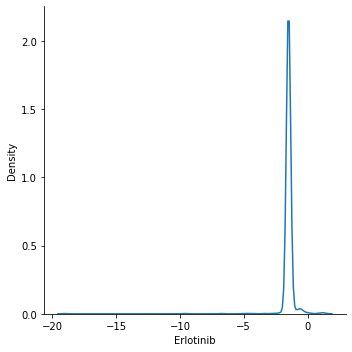

In [ ]:
sns.displot(y, kind="kde")

In [ ]:
# So we can see that the target values have skewed distribution with a long initial tail


In [ ]:
X = dataset[features]

In [ ]:
X.head()

,exp_COPZ2,exp_CRLF1,exp_TAC1,exp_ADIPOR2,exp_IFFO1,exp_KDM5D,exp_CD6,exp_STMN4,exp_KCNG1,exp_ABCF2,exp_CLEC16A,exp_ANO2,exp_MAP4,exp_RSF1,exp_MSMO1,exp_KIF1B,exp_GALC,exp_TRAF1,exp_RC3H2,exp_POU1F1,exp_OAT,exp_SNAP91,exp_SLK,exp_GOLGA5,exp_FECH,exp_IARS2,exp_IFI35,exp_ATP11A,exp_SRBD1,exp_MAPK6,exp_POLB,exp_CPSF1,exp_MPP5,exp_XRCC1,exp_CLCN4,exp_DHRS9,exp_PTPLAD1,exp_ARHGEF10L,exp_SEMA3A,exp_FOSL2,...,exp_BMP3,exp_GRIK2,exp_SH3GLB1,exp_CRYBB3,exp_ADRA2A,exp_PROP1,exp_ZBTB39,exp_TMPRSS15,exp_KRT75,exp_KCTD14,exp_SIPA1,exp_IFT57,exp_UCN,exp_PITPNM1,exp_PLXNC1,exp_BTG1,exp_PYCARD,exp_LRBA,exp_NFIX,exp_ARHGAP11A,exp_WNT2,exp_CLEC1A,exp_AC016745.2,exp_MRPS30,exp_PDHX,exp_IFRD1,exp_WSB1,exp_FAM65B,exp_RAB11B,exp_ROGDI,exp_SCN8A,exp_POMT1,exp_NKG7,exp_SLC6A16,exp_CCDC91,exp_CACNA1A,exp_ZSCAN18,exp_FRK,exp_MCF2,exp_TULP3
0,NaN,4.248105,4.282751,8.576592,5.070674,7.759352,4.602019,5.190350,7.385830,6.171773,4.987999,4.386405,8.319581,5.124842,11.375434,6.950165,5.217493,NaN,6.435574,NaN,9.526227,6.999370,8.224666,8.260464,7.391606,10.130519,4.870403,4.980934,5.472737,NaN,9.001038,6.675385,NaN,6.187631,4.315376,4.931067,7.130860,5.633721,4.477679,4.719276,...,NaN,4.686992,7.177287,NaN,6.883827,4.598454,NaN,4.284136,NaN,4.440254,4.911507,9.585117,5.027490,5.036847,NaN,9.791068,4.625075,7.681521,6.666518,5.270228,5.207163,5.422417,4.337242,8.241133,8.382914,9.184904,7.742239,4.287793,5.283270,6.230765,4.822764,6.456653,4.176977,4.631245,7.569865,3.977183,5.957110,4.175269,4.545129,6.618855
1,4.751625,5.023276,4.115669,9.590657,5.061421,7.587566,5.236536,4.443490,5.612640,6.730912,4.864545,4.943098,8.066804,6.124239,10.231029,7.489231,7.691186,5.011970,5.999923,4.308970,9.492482,4.030367,NaN,9.338579,6.708432,9.453979,6.439538,NaN,6.946307,11.126428,9.291950,7.097342,6.433115,NaN,4.412739,4.814770,6.998661,5.164618,4.884515,NaN,...,4.444570,4.358778,8.188934,5.142681,4.136258,4.544278,4.941061,4.201556,4.396772,4.583461,6.999289,8.163342,4.842256,6.948345,5.084298,10.412581,4.565369,8.173671,4.623452,4.957271,NaN,NaN,4.900543,9.040116,9.393895,7.948395,8.457218,4.219205,5.633389,6.534319,4.540494,6.910684,4.401302,4.524092,7.042128,4.570753,5.190979,NaN,4.299898,6.977388
2,4.677830,NaN,4.414835,9.810794,6.758992,7.213987,5.124261,4.536834,5.591881,6.117747,5.859097,4.496934,7.267437,6.320760,9.377906,5.542714,5.434801,5.567857,7.095067,4.277238,8.756498,3.866247,8.189768,8.381984,5.496081,NaN,6.335457,5.011294,8.176531,9.690427,9.146354,7.017636,5.596143,7.624439,NaN,4.241132,7.799697,5.360729,4.421699,4.293521,...,4.928524,4.344378,8.670321,4.658982,4.298158,4.702590,5.245217,4.581799,4.534433,4.485550,7.778415,10.985411,4.636973,5.340667,5.378795,NaN,8.743635,7.189665,4.625829,5.722414,4.726665,4.348811,4.918840,8.370305,NaN,7.459172,9.292843,7.562419,5.018919,NaN,4.759826,5.089853,4.767632,6.040111,NaN,4.807369,7.381605,4.096595,4.353280,6.298527
3,6.124125,4.315419,NaN,8.329743,4.731405,5.485750,4.656342,4.675843,8.274558,6.881935,NaN,4.591374,7.445409,6.357788,9.290170,7.845277,5.044321,NaN,7.719963,4.035399,9.141353,NaN,8.551670,9.144304,5.548422,9.824597,6.064520,4.815694,5.979735,11.435274,9.978174,6.561652,6.091851,6.910335,4.598375,4.179916,NaN,5.931737,7.028722,4.605834,...,4.048016,4.358081,NaN,4.892956,NaN,4.611666,5.367584,4.124489,4.336504,5.554679,5.722613,8.602560,4.498691,5.149122,4.895340,10.234215,5.384634,NaN,4.779799,NaN,4.830473,NaN,4.296301,8.506786,8.617698,10.072301,9.776818,4.165963,4.839643,6.508814,4.824067,5.633577,4.036759,4.647674,NaN,4.353842,5.349520,4.527658,4.183776,7.080237
4,7.329050,4.478514,3.794459,9.871205,4.803878,4.255231,4.704262,4.006748,NaN,7.404784,5.321569,3.896046,8.335643,7.003983,10.668207,NaN,6.792095,4.712382,NaN,4.268368,11.301256,4.159530,9.948436,9.129477,6.772887,10.375022,6.896724,4.862472,6.174870,10.928988,9.591413,7.019537,6.983679,6.086106,4.115092,4.121604,8.456983,5.490146,5.495464,4.864460,...,NaN,4.553433,8.066421,4.570516,3.956439,4.483610,5.296590,3.994717,4.616485,5.856

In [ ]:
#Counting the total number of NaNs in each columns
NaN4Features = X.isnull().sum()

In [ ]:
print(NaN4Features)

exp_COPZ2      112
exp_CRLF1      112
exp_TAC1       112
exp_ADIPOR2    112
exp_IFFO1      112
              ... 
exp_CACNA1A    112
exp_ZSCAN18    112
exp_FRK        112
exp_MCF2       112
exp_TULP3      112
Length: 1320, dtype: int64


In [ ]:
#This means that each of the feature columns have 112 /1124 = 10% as NaN values that should be imputed

In [ ]:
#Total sum of NaN values in the dataset
X.isnull().values.sum()

147840

In [ ]:
147840 / 1320 #Dividing the total number of NaNs by total number of features

112.0

In [ ]:
#This is the same number of NaNs per column variable as we calculated earlier

In [ ]:
#

In [ ]:
#Now I am imputing the missing values by median
X = X.fillna(X.median())

In [ ]:
X.head()

,exp_COPZ2,exp_CRLF1,exp_TAC1,exp_ADIPOR2,exp_IFFO1,exp_KDM5D,exp_CD6,exp_STMN4,exp_KCNG1,exp_ABCF2,exp_CLEC16A,exp_ANO2,exp_MAP4,exp_RSF1,exp_MSMO1,exp_KIF1B,exp_GALC,exp_TRAF1,exp_RC3H2,exp_POU1F1,exp_OAT,exp_SNAP91,exp_SLK,exp_GOLGA5,exp_FECH,exp_IARS2,exp_IFI35,exp_ATP11A,exp_SRBD1,exp_MAPK6,exp_POLB,exp_CPSF1,exp_MPP5,exp_XRCC1,exp_CLCN4,exp_DHRS9,exp_PTPLAD1,exp_ARHGEF10L,exp_SEMA3A,exp_FOSL2,...,exp_BMP3,exp_GRIK2,exp_SH3GLB1,exp_CRYBB3,exp_ADRA2A,exp_PROP1,exp_ZBTB39,exp_TMPRSS15,exp_KRT75,exp_KCTD14,exp_SIPA1,exp_IFT57,exp_UCN,exp_PITPNM1,exp_PLXNC1,exp_BTG1,exp_PYCARD,exp_LRBA,exp_NFIX,exp_ARHGAP11A,exp_WNT2,exp_CLEC1A,exp_AC016745.2,exp_MRPS30,exp_PDHX,exp_IFRD1,exp_WSB1,exp_FAM65B,exp_RAB11B,exp_ROGDI,exp_SCN8A,exp_POMT1,exp_NKG7,exp_SLC6A16,exp_CCDC91,exp_CACNA1A,exp_ZSCAN18,exp_FRK,exp_MCF2,exp_TULP3
0,6.026625,4.248105,4.282751,8.576592,5.070674,7.759352,4.602019,5.190350,7.385830,6.171773,4.987999,4.386405,8.319581,5.124842,11.375434,6.950165,5.217493,4.938025,6.435574,4.446789,9.526227,6.999370,8.224666,8.260464,7.391606,10.130519,4.870403,4.980934,5.472737,10.831060,9.001038,6.675385,6.404888,6.187631,4.315376,4.931067,7.130860,5.633721,4.477679,4.719276,...,4.354925,4.686992,7.177287,4.651391,6.883827,4.598454,5.111562,4.284136,4.473125,4.440254,4.911507,9.585117,5.027490,5.036847,4.956280,9.791068,4.625075,7.681521,6.666518,5.270228,5.207163,5.422417,4.337242,8.241133,8.382914,9.184904,7.742239,4.287793,5.283270,6.230765,4.822764,6.456653,4.176977,4.631245,7.569865,3.977183,5.957110,4.175269,4.545129,6.618855
1,4.751625,5.023276,4.115669,9.590657,5.061421,7.587566,5.236536,4.443490,5.612640,6.730912,4.864545,4.943098,8.066804,6.124239,10.231029,7.489231,7.691186,5.011970,5.999923,4.308970,9.492482,4.030367,8.304327,9.338579,6.708432,9.453979,6.439538,5.027603,6.946307,11.126428,9.291950,7.097342,6.433115,6.852925,4.412739,4.814770,6.998661,5.164618,4.884515,4.816928,...,4.444570,4.358778,8.188934,5.142681,4.136258,4.544278,4.941061,4.201556,4.396772,4.583461,6.999289,8.163342,4.842256,6.948345,5.084298,10.412581,4.565369,8.173671,4.623452,4.957271,4.906078,4.650345,4.900543,9.040116,9.393895,7.948395,8.457218,4.219205,5.633389,6.534319,4.540494,6.910684,4.401302,4.524092,7.042128,4.570753,5.190979,4.286217,4.299898,6.977388
2,4.677830,4.446010,4.414835,9.810794,6.758992,7.213987,5.124261,4.536834,5.591881,6.117747,5.859097,4.496934,7.267437,6.320760,9.377906,5.542714,5.434801,5.567857,7.095067,4.277238,8.756498,3.866247,8.189768,8.381984,5.496081,9.868591,6.335457,5.011294,8.176531,9.690427,9.146354,7.017636,5.596143,7.624439,4.551778,4.241132,7.799697,5.360729,4.421699,4.293521,...,4.928524,4.344378,8.670321,4.658982,4.298158,4.702590,5.245217,4.581799,4.534433,4.485550,7.778415,10.985411,4.636973,5.340667,5.378795,9.818872,8.743635,7.189665,4.625829,5.722414,4.726665,4.348811,4.918840,8.370305,8.426129,7.459172,9.292843,7.562419,5.018919,6.202955,4.759826,5.089853,4.767632,6.040111,7.338810,4.807369,7.381605,4.096595,4.353280,6.298527
3,6.124125,4.315419,4.059244,8.329743,4.731405,5.485750,4.656342,4.675843,8.274558,6.881935,5.526621,4.591374,7.445409,6.357788,9.290170,7.845277,5.044321,4.938025,7.719963,4.035399,9.141353,4.423414,8.551670,9.144304,5.548422,9.824597,6.064520,4.815694,5.979735,11.435274,9.978174,6.561652,6.091851,6.910335,4.598375,4.179916,7.737674,5.931737,7.028722,4.605834,...,4.048016,4.358081,8.765140,4.892956,4.119168,4.611666,5.367584,4.124489,4.336504,5.554679,5.722613,8.602560,4.498691,5.149122,4.895340,10.234215,5.384634,7.184992,4.779799,5.040604,4.830473,4.650345,4.296301,8.506786,8.617698,10.072301,9.776818,4.165963,4.839643,6.508814,4.824067,5.633577,4.036759,4.647674,7.338810,4.353842,5.349520,4.527658,4.183776,7.080237
4,7.329050,4.478514,3.794459,9.871205,4.803878,4.255231,4.704262,4.006748,6.240779,7.404784,5.321569,3.896046,8.335643,7.003983,10.668207,7.532797,6.792095,4.712382,6.773352,4.268368,11.301256,4.159530,9.948436,9.129477,6.772887,10.375022,6.896724,4.862472,6.1

In [ ]:
#Now checking for NaN in target variable
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1119    False
1120    False
1121    False
1122    False
1123    False
Name: Erlotinib, Length: 1124, dtype: bool

In [ ]:
#So there is no NaN value in target

In [ ]:
#Now I split the predictors and target into train and test

In [ ]:
Xtrain, Xtest , yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)

Now doing Dimensionality reduction

In [ ]:
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)

In [ ]:
#Now lets look how much variance is covered by the first two components

In [ ]:
pcaObj.explained_variance_ratio_

array([0.10716541, 0.06806911])

In [ ]:
#Clearly, using this method has lead to a very poor dimensionality reduction, given that the first two 
#components cover 10 + 6 = 16% variance only.

In [ ]:
#So now I use dimensionality reduction in order to preserve at least 95% of variance

In [ ]:
pcaObj = PCA(n_components = 0.95)
pcaObj.fit(xTrain)
xTrainPCA95 = pcaObj.transform(xTrain)

In [ ]:
pcaObj.explained_variance_ratio_

array([0.10716541, 0.06806911, 0.05275465, 0.04181058, 0.02415876,
       0.01839043, 0.01796245, 0.01536028, 0.01453125, 0.01361155,
       0.01213755, 0.01184905, 0.01047929, 0.00998007, 0.00943349,
       0.00834483, 0.00819757, 0.00757915, 0.007365  , 0.00699956,
       0.00695795, 0.00642691, 0.0063516 , 0.00614098, 0.00594324,
       0.0058252 , 0.00561031, 0.00555937, 0.00539527, 0.0051737 ,
       0.0050866 , 0.0048788 , 0.00480121, 0.00477309, 0.00464728,
       0.00455006, 0.00441028, 0.00435373, 0.00428504, 0.00415356,
       0.00412799, 0.00407086, 0.00398949, 0.00391131, 0.00384315,
       0.00377568, 0.00374471, 0.00369586, 0.00364361, 0.00360151,
       0.00351461, 0.00348137, 0.00345646, 0.00335105, 0.00334836,
       0.00330679, 0.00330222, 0.00324425, 0.00318309, 0.00314982,
       0.00308709, 0.00307777, 0.00302968, 0.0029775 , 0.00293585,
       0.00291113, 0.00289386, 0.00285368, 0.00278253, 0.00274853,
       0.00272285, 0.00270061, 0.00264332, 0.00261769, 0.00259

In [ ]:
#This also does not seem to be working given that in order to get 95% variance, there is hardly any reduction
#in dimension as we still have a lot of dimensions.

#Lets look at our data again

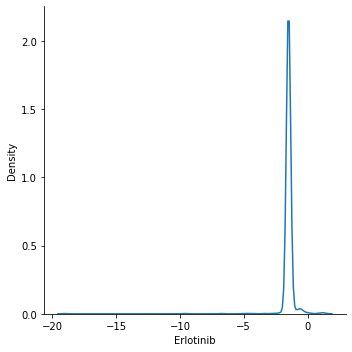

In [ ]:
sns.displot(y, kind="kde")

In [ ]:
# Clearly, there is no point in having those data points where the value of Erlotinib y value is less
#than -2 or more than -1. This is because we do not have adequate data points for those y values and it would be better if
# we discard those data values. This will also ensure that we have a more normal distribution. 


In [ ]:
datasetGaussian = dataset[(dataset.Erlotinib>-1.51) & (dataset.Erlotinib < -1.44)]

In [ ]:
datasetGaussian.shape

(1057, 1321)

In [ ]:
yGaussian = datasetGaussian.Erlotinib

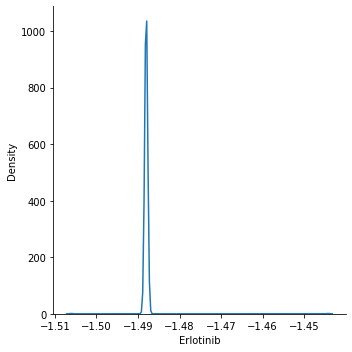

In [ ]:
sns.displot(yGaussian, kind="kde")

In [ ]:
#Great, so we get rid of a lot of sparse data. 
#Now lets continue the procedure as earlier

In [ ]:
yGaussian.describe()

count    1057.000000
mean       -1.487995
std         0.001455
min        -1.506084
25%        -1.488020
50%        -1.488020
75%        -1.488020
max        -1.444320
Name: Erlotinib, dtype: float64

In [ ]:
features = list(datasetGaussian.columns.values) #Make a list of all of the columns in the df. Here note we are using datasetGaussian
features.pop(features.index('Erlotinib'))
X = datasetGaussian[features]
NaN4Features = X.isnull().sum()
X.isnull().values.sum()

138903

In [ ]:
X = X.fillna(X.median())

In [ ]:
Xtrain, Xtest , yTrain, yTest = train_test_split(X, yGaussian, test_size=0.3, random_state=3)

In [ ]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)

In [ ]:
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.10113769, 0.07096458])

In [ ]:
#We see that there is only a slight improvement in percentage variance captured i.e., its 17% now.

In [ ]:
#Lets see if I can further improve it, by normalizing yGaussian


In [ ]:
meanY = np.mean(yGaussian)
stdY = np.std(yGaussian)

In [ ]:
meanY

-1.4879954205817751

In [ ]:
stdY

0.0014542378967196325

In [ ]:
yNorm = (yGaussian-meanY)/stdY


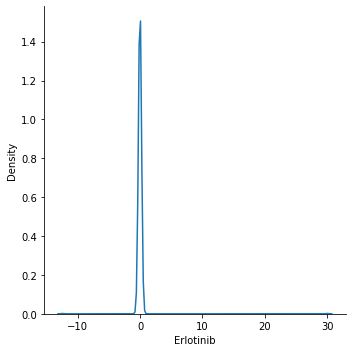

In [ ]:
sns.displot(yNorm, kind="kde")

In [ ]:
#Lets Normalize X

In [ ]:
meanX = np.mean(X)
stdX = np.std(X)

In [ ]:
meanX.head()

exp_COPZ2      6.095576
exp_CRLF1      4.538463
exp_TAC1       4.117218
exp_ADIPOR2    8.983011
exp_IFFO1      6.048303
dtype: float64

In [ ]:
XNorm = (X-meanX)/stdX

In [ ]:
XNorm = XNorm.fillna(X.median())

In [ ]:
Xtrain, Xtest , yTrain, yTest = train_test_split(XNorm, yNorm, test_size=0.3, random_state=3)

In [ ]:
#Converting to numpy array for computation purpose
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.07057935, 0.06069826])

In [ ]:
#This did not work either, as the cumulative variance percentage in fact got less.

In [ ]:
#Lets try it with yGaussian, which has original y values. This will ensure that the model will predict the right
#values and not the normalized values
Xtrain, Xtest , yTrain, yTest = train_test_split(XNorm, yGaussian, test_size=0.3, random_state=3)

In [ ]:
xTrain = np.array(Xtrain)
xTest = np.array(Xtest)
pcaObj = PCA(n_components = 2)
pcaObj.fit(xTrain)
xTrainPCA = pcaObj.transform(xTrain)
pcaObj.explained_variance_ratio_

array([0.07057935, 0.06069826])

#Remarks: Despite using several strategies for dimensionality reduction, it does not seem to be working well, given that the combined variance of initial components looks to be very less despite all the strategies. 

For calculations ahead, I shall use the xTrain, xTest, yTrain and yTest as derived using yGaussian, as it will help me build a model that will give the true value of y (Erlotinib)

In [ ]:
#Lets try Polynomial Regression and then we will use ElasticNet

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias= False)

In [ ]:
X_poly = poly_features.fit_transform(xTrain)

In [ ]:
xTrain[0].shape

(1320,)

In [ ]:
xTrain.shape

(739, 1320)

In [ ]:
X_poly[0].shape

(873180,)

In [ ]:
X_poly.shape

(739, 873180)

In [ ]:
#So we see that X_poly now has far more columns than xTrain which is a result of combination of all 2nd degree
# variables. Total attributes is equal to ( 1320 + 2 )! / (1320! 2!)

In [ ]:
#Now fitting a 

In [ ]:
lin_reg = LinearRegression()

NameError: ignored

In [ ]:
lin_reg.fit(X_poly,yTrain)

This gave the error :Your session crashed after using all available RAM
Thus, I am abandoning polynomial fitting

In [ ]:
#If we had managed to do dimensionality reduction, then it would have made sense to carry out Polynomial fit.

In [ ]:
#Lets start simple linear regression fit.
lin_reg = LinearRegression()

In [ ]:
#Lets first design a cross-validation set up as desired.
#For that I make use of GridSearch
#GridSearchCV should be used to find the optimal parameters to train your final model. 
#Typically, you should run GridSearchCV then look at the parameters that gave the model with the best score. 
#You should then take these parameters and train your final model on all of the data. It is important to 
#note that if you have trained your final model on all of your data, you cannot test it. For any correct test, 
#you must must reserve some of the data. That is why I am reserving the test data for the purpose.

In [ ]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]} #Note that although I have done normalization, I am repeating it make a second normalization

In [ ]:
grid_search = GridSearchCV(lin_reg, parameters, cv=5, scoring='r2', verbose=1, return_train_score=True)#Five fold cross validation




In [ ]:
grid_search.fit(Xtrain, yTrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   12.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:

print("Residual sum of squares: %.11f" % np.mean((grid_search.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00000362019


In [ ]:
print('Best Score: ', grid_search.best_score_) #Gets the best R2 value score
print('Best Params: ', grid_search.best_params_) #Gets the parameter corresponding to it

Best Score:  -3.8223840746931947e+25
Best Params:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [ ]:
#Here the R2 score is close to 0

In [ ]:
#Now doing Linear Regression WITHOUT Grid Search cross validation
model = LinearRegression()
model.fit(Xtrain, yTrain)
#predictions = model.predict(XTest)
print("r2/variance : ", model.score(Xtest,yTest))
print("Residual sum of squares: %.11f" % np.mean((model.predict(Xtest) - yTest) ** 2))

r2/variance :  -2.53883707130276
Residual sum of squares: 0.00000362019


In [ ]:
#Here the R2 score became  negative, and so the model is not as good as what we found by GridSearch

We see that R2 score is lowest for grid_search selected model. 


In [ ]:
#The simple linear regression can also help us get the coefficients of each of the feature variables which we can plot

In [ ]:
featureCoefficients = pd.DataFrame() 
featureCoefficients["Features"] = pd.DataFrame(Xtrain).columns
featureCoefficients['PredictedValues'] = pd.Series(model.coef_) 

print(featureCoefficients) 

         Features  PredictedValues
0       exp_COPZ2         0.000034
1       exp_CRLF1        -0.000041
2        exp_TAC1         0.000018
3     exp_ADIPOR2        -0.000088
4       exp_IFFO1         0.000016
...           ...              ...
1315  exp_CACNA1A        -0.000029
1316  exp_ZSCAN18         0.000010
1317      exp_FRK        -0.000017
1318     exp_MCF2        -0.000049
1319    exp_TULP3         0.000022

[1320 rows x 2 columns]


In [ ]:
# find optimal alpha with grid search and Lasso Regression for regularization
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
lasso = Lasso()
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = grid.fit(Xtrain, yTrain)
print('Best Score: ', grid_result.best_score_) #Get best R2 score
print('Best Params: ', grid_result.best_params_) #Get the alpha parameter which corresponds to best results



Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  -8.863774182386283e+22
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    6.4s finished


In [ ]:
print("Residual sum of squares: %.11f" % np.mean((grid_result.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00000103643


We see that the residual sum of squares have dropped compared to previous models. However, there is no significant improvement in R2 score compared to the model we obtained using GridSearch with simple linear regression model. The n_jobs=-1 takes in all available cores.


In [ ]:
#Now making models for ElasticNet
elastic_net = ElasticNet()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, cv=5, n_jobs=-1)
grid_result = grid.fit(Xtrain, yTrain)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   41.0s


Best Score:  -8.863774182386283e+22
Best Params:  {'alpha': 0.01, 'l1_ratio': 0.2}


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:  1.4min finished


In [ ]:
print("Residual sum of squares: %.11f" % np.mean((grid_result.predict(Xtest) - yTest) ** 2))

Residual sum of squares: 0.00000103643


There is no improvement in residual sum of squared than lasso. So essentially either lasso model or elasticnet model can be used which has the lowest residual sum of squares.

In [ ]:
#In order to get the coefficients of each of the predictors, we will now have 
#to build a model with the parameters as we obtained best by GridSearch

In [ ]:
eNet = ElasticNet(alpha=0.01, l1_ratio= 0.2) 


In [ ]:
eNet.fit(Xtrain, yTrain) 
  


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.2,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# calculate the prediction and mean square error 
yPred = eNet.predict(Xtest) 
print("Mean Squared Error:", np.mean((yPred - yTest)**2)) 
 

Mean Squared Error: 1.0364317660283728e-06


In [ ]:
#Now lets get the coefficients
eNetCoeff = pd.DataFrame() 
eNetCoeff["Features"] = Xtrain.columns 
eNetCoeff['PredictedCoefficients'] = pd.Series(eNet.coef_) 

In [ ]:
eNetCoeff

,Features,PredictedCoefficients
0,exp_COPZ2,0.0
1,exp_CRLF1,-0.0
2,exp_TAC1,-0.0
3,exp_ADIPOR2,-0.0
4,exp_IFFO1,-0.0
...,...,...
1315,exp_CACNA1A,0.0
1316,exp_ZSCAN18,-0.0
1317,exp_FRK,-0.0
1318,exp_MCF2,-0.0


In [ ]:
#The End#